In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(DESeq2))

source("../../global_variables.R")
source("/workdir/cjl332/cfrna_template/theme_ggplot_cfrna.R")

## Read in meta data and subset
mdf = read.csv("../0_DATA/metadata_all.csv")


FILL_KEY = INFLAMCAT_FILL_KEY
FILL_KEY_plt  = INFLAMCAT_FILL_KEY
names(FILL_KEY_plt) = gsub("_","\n",names(FILL_KEY_plt))

---
## Subsample to 17

In [8]:
all_res = readRDS("./sub_output/pairwise_DAA.sub.OLD.rds")

In [9]:
### load original analysis results
orig_analysis = readRDS("../output/occur.rds")

### extract # DAGs for each comparison
orig_sig <- lapply(names(orig_analysis), function(x) {
    orig_analysis[[x]][["all_sig_df"]] %>% filter(grepl("Healthy",comp)) %>% filter(padj < 0.05) %>% nrow()
})

### convert into data frame for plotting
names(orig_sig) <- names(orig_analysis)
orig_sig_df <- do.call("rbind", orig_sig) %>% as.data.frame() %>% 
    dplyr::rename(n_sig = V1) %>%  
    rownames_to_column("ref") %>% mutate(grp = paste0(ref,"<>Healthy"), comp = paste0(grp,"_00"))  %>% 
    filter(ref != "Healthy")  %>% 
    mutate(ORIG = "orig") %>% mutate(ref = gsub("_","\n",ref))

### extract other number and remove from data
OTHER_VAL = orig_sig_df %>% filter(ref == "other") %>% pull(n_sig)
orig_sig_df

ref,n_sig,grp,comp,ORIG
<chr>,<int>,<chr>,<chr>,<chr>
KD,6591,KD<>Healthy,KD<>Healthy_00,orig
viral infection,5743,viral_infection<>Healthy,viral_infection<>Healthy_00,orig
MISC,6591,MISC<>Healthy,MISC<>Healthy_00,orig
bacterial infection,6083,bacterial_infection<>Healthy,bacterial_infection<>Healthy_00,orig
other,2686,other<>Healthy,other<>Healthy_00,orig


In [10]:
### load all subsampled analyses
all_comps <- names(all_res)
all_comps <- all_comps[grepl("Healthy",all_comps)]

### extract # DAGs for each comparison
all_sig <- lapply(all_comps, function(x) all_res[[x]][['res_df']] %>% filter(padj < 0.05) %>% mutate(comp = x))

### convert into data frame for plotting
all_sig_df <- do.call("rbind",all_sig) %>% 
    group_by(comp) %>% 
    summarise(n_sig = n()) %>% 
    mutate(grp = gsub("Healthy_.*","Healthy",comp)) %>% 
    mutate(ref = gsub("<>Healthy","",grp))%>% 
    mutate(ORIG = "subsample") %>% 
    filter(ref != "other")
    
### add original data
# all_sig_df <- rbind(orig_sig_df,all_sig_df )

all_sig_df %>% head()


comp,n_sig,grp,ref,ORIG
<chr>,<int>,<chr>,<chr>,<chr>
KD<>Healthy_1,4971,KD<>Healthy,KD,subsample
KD<>Healthy_10,5082,KD<>Healthy,KD,subsample
KD<>Healthy_2,5632,KD<>Healthy,KD,subsample
KD<>Healthy_3,5669,KD<>Healthy,KD,subsample
KD<>Healthy_4,3757,KD<>Healthy,KD,subsample
KD<>Healthy_5,5091,KD<>Healthy,KD,subsample


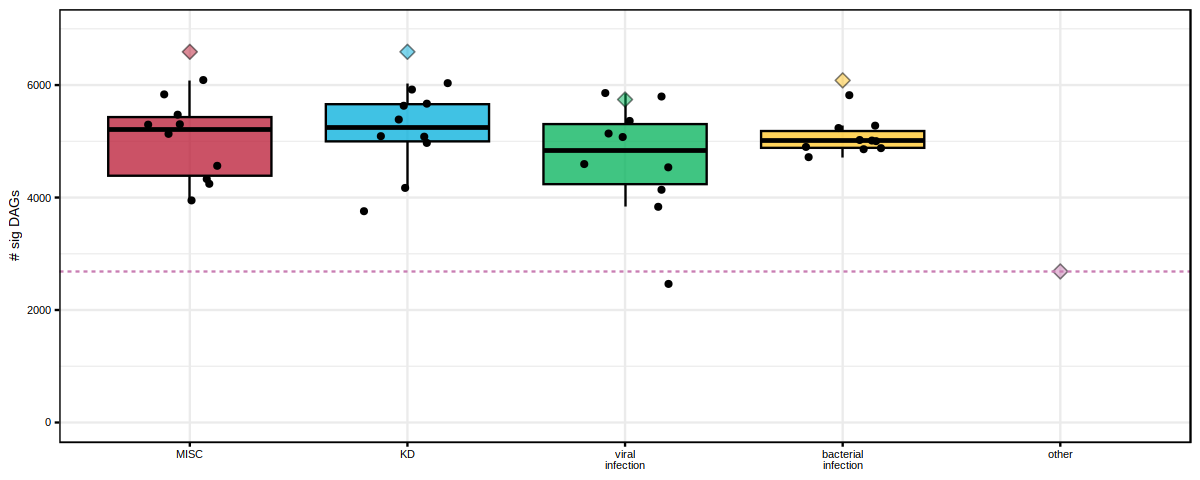

In [11]:
options(repr.plot.height = 4, repr.plot.width  = 10)
all_sig_df %>% 
    mutate(ref = gsub("_","\n",ref)) %>%
    mutate(ref = factor(ref, levels = c("MISC","KD","viral\ninfection","bacterial\ninfection","other"))) %>%
    ggplot(aes(x=ref,y=n_sig,fill=ref)) +
    geom_boxplot(outlier.shape = NA, color = "black", alpha = 0.75)+
    geom_jitter(width = 0.2, height = 0, color = "black", size = 2, stroke=NA)+
    theme_cfrna_print()+
    labs(y = "# sig DAGs") +
    coord_cartesian(ylim = c(0,7000))+
    theme(axis.title.x = element_blank())+
    geom_point(data = orig_sig_df, aes(x=ref,y=n_sig,fill=ref), shape = 23, size = 3, alpha = 0.5, color = "black")+
    geom_hline(yintercept = OTHER_VAL, linetype = "dashed", color = FILL_KEY[["other"]])+
    scale_fill_manual(values = FILL_KEY_plt) 

ggsave("./figures/num_sig_dags.subsample.17.pdf",width = 3, height = 2, units = "in")

---
## Subsample to 9

In [12]:
all_res = readRDS("./sub_output/pairwise_DAA.sub.9.rds")

In [13]:
### load original analysis results
orig_analysis = readRDS("../output/occur.rds")

### extract # DAGs for each comparison
orig_sig <- lapply(names(orig_analysis), function(x) {
    orig_analysis[[x]][["all_sig_df"]] %>% filter(grepl("Healthy",comp)) %>% filter(padj < 0.05) %>% nrow()
})

### convert into data frame for plotting
names(orig_sig) <- names(orig_analysis)
orig_sig_df <- do.call("rbind", orig_sig) %>% as.data.frame() %>% 
    dplyr::rename(n_sig = V1) %>%  
    rownames_to_column("ref") %>% mutate(grp = paste0(ref,"<>Healthy"), comp = paste0(grp,"_00"))  %>% 
    filter(ref != "Healthy")  %>% 
    mutate(ORIG = "orig") %>% mutate(ref = gsub("_","\n",ref))

### extract other number and remove from data
OTHER_VAL = orig_sig_df %>% filter(ref == "other") %>% pull(n_sig)
orig_sig_df

ref,n_sig,grp,comp,ORIG
<chr>,<int>,<chr>,<chr>,<chr>
KD,6591,KD<>Healthy,KD<>Healthy_00,orig
viral infection,5743,viral_infection<>Healthy,viral_infection<>Healthy_00,orig
MISC,6591,MISC<>Healthy,MISC<>Healthy_00,orig
bacterial infection,6083,bacterial_infection<>Healthy,bacterial_infection<>Healthy_00,orig
other,2686,other<>Healthy,other<>Healthy_00,orig


In [14]:
### load all subsampled analyses
all_comps <- names(all_res)
all_comps <- all_comps[grepl("Healthy",all_comps)]

### extract # DAGs for each comparison
all_sig <- lapply(all_comps, function(x) all_res[[x]][['res_df']] %>% filter(padj < 0.05) %>% mutate(comp = x))

### convert into data frame for plotting
all_sig_df <- do.call("rbind",all_sig) %>% 
    group_by(comp) %>% 
    summarise(n_sig = n()) %>% 
    mutate(grp = gsub("Healthy_.*","Healthy",comp)) %>% 
    mutate(ref = gsub("<>Healthy","",grp))%>% 
    mutate(ORIG = "subsample") %>% 
    filter(ref != "other")
    
### add original data
# all_sig_df <- rbind(orig_sig_df,all_sig_df )

all_sig_df %>% head()


comp,n_sig,grp,ref,ORIG
<chr>,<int>,<chr>,<chr>,<chr>
KD<>Healthy_1,3239,KD<>Healthy,KD,subsample
KD<>Healthy_10,5641,KD<>Healthy,KD,subsample
KD<>Healthy_2,4574,KD<>Healthy,KD,subsample
KD<>Healthy_3,3926,KD<>Healthy,KD,subsample
KD<>Healthy_4,2135,KD<>Healthy,KD,subsample
KD<>Healthy_5,3027,KD<>Healthy,KD,subsample


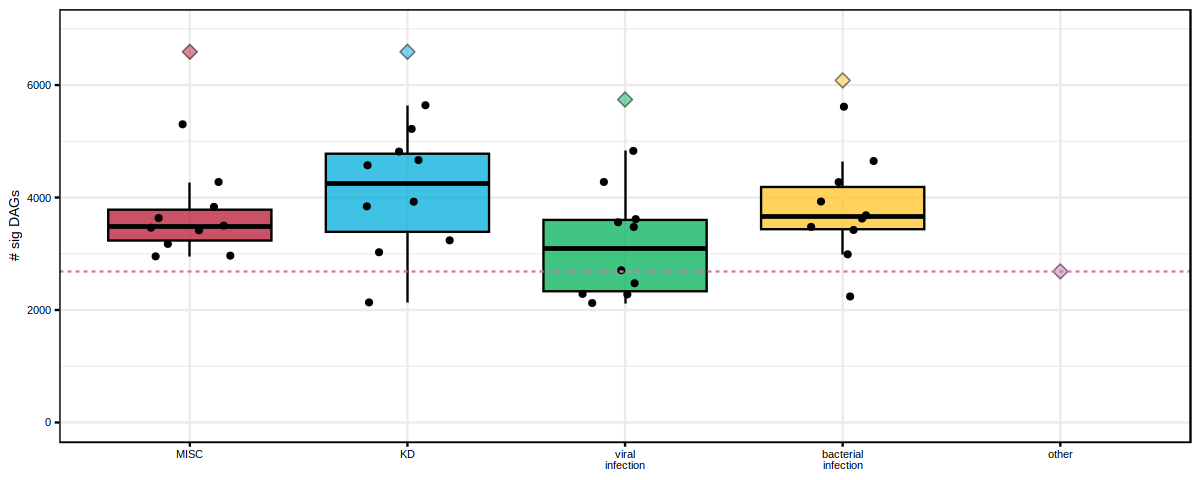

In [15]:
options(repr.plot.height = 4, repr.plot.width  = 10)
all_sig_df %>% 
    mutate(ref = gsub("_","\n",ref)) %>%
    mutate(ref = factor(ref, levels = c("MISC","KD","viral\ninfection","bacterial\ninfection","other"))) %>%
    ggplot(aes(x=ref,y=n_sig,fill=ref)) +
    geom_boxplot(outlier.shape = NA, color = "black", alpha = 0.75)+
    geom_jitter(width = 0.2, height = 0, color = "black", size = 2, stroke=NA)+
    theme_cfrna_print()+
    labs(y = "# sig DAGs") +
    coord_cartesian(ylim = c(0,7000))+
    theme(axis.title.x = element_blank())+
    geom_point(data = orig_sig_df, aes(x=ref,y=n_sig,fill=ref), shape = 23, size = 3, alpha = 0.5, color = "black")+
    geom_hline(yintercept = OTHER_VAL, linetype = "dashed", color = FILL_KEY[["other"]])+
    scale_fill_manual(values = FILL_KEY_plt) 

ggsave("./figures/num_sig_dags.subsample.9.pdf",width = 3, height = 2, units = "in")

---

In [16]:
# How specific are the enriched pathways for the group of differential genes that are shared between all conditions compared to the other differential genes? 

### Number / fraction of genes that are in the selected pathways (use outputs from IPA)

ipa_output <- read.delim("../output/common_healthy-daa.ipa-table.csv.txt",skip=2)
colnames(ipa_output) <- c("pathway","neglog_pval","ratio","z.score","genes","X")

# PVAL_THRESH = 0.05

### get all pathways
ipa_output <- ipa_output %>% 
    filter(!is.na(neglog_pval)) %>% 
    filter(!is.na(z.score)) %>% 
    filter(neglog_pval > -log(PVAL_THRESH)) %>% 
    arrange(desc(neglog_pval))

### extract genes from pathways
all_genes <- ipa_output %>% pull(genes) %>% unlist()
all_genes <- lapply(all_genes,function(x) strsplit(x,",")[[1]]) %>% unlist() %>% unique()

### check how many genes are not in input
t = read.csv("../output/common_healthy-daa.ipa-table.csv")
gene_list <- read.delim("/workdir/cfrna/references/human/hg38/gencode.biotype.name.key.tsv")
t <- merge(t, gene_list, by="gene_id")




### prints
print(paste0("num pathways: ",ipa_output %>% nrow()))
print(paste0("num genes: ",all_genes %>% length()))
print(paste0("num genes in input: ",t %>% filter(gene_name %in% all_genes) %>% nrow()))


[1] "num pathways: 283"
[1] "num genes: 1033"
[1] "num genes in input: 1026"


In [7]:
all_genes[!(all_genes %in% t$gene_name)]

[1] "DEFA1 (includes others)" "FCGR3A/FCGR3B"          
[3] "H2BC26"                  "CALM1 (includes others)"
[5] "H3-3A/H3-3B"             "TMSB10/TMSB4X"          
[7] "BLTP3B"                  "PALS1"

---
## Overlap of pathways

In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.4     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.0     ✔ stringr 1.5.1
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [14]:
all <- read.delim("../output/common_healthy-daa.ipa-table.csv.txt",skip=2)
top4 <- read.delim("./sub_output/tmp_ipaOverlap4.txt",skip=2)

colnames(all) <- colnames(top4) <- c("pathway","neglog_pval","ratio","z.score","genes","X")
#  c("pathway","neglog_pval","ratio","z.score","genes","X")

PVAL_THRESH = 0.05
 
all_sig <- all %>% filter(!is.na(neglog_pval)) %>% filter(!is.na(z.score)) %>% filter(neglog_pval > -log(PVAL_THRESH))
top4_sig <- top4 %>% filter(!is.na(neglog_pval)) %>% filter(!is.na(z.score)) %>% filter(neglog_pval > -log(PVAL_THRESH))

all_sig_path <- all_sig %>% pull(pathway) %>% unique()
top4_sig_path <- top4_sig %>% pull(pathway) %>% unique()

all_sig_path %>% length()
top4_sig_path %>% length()
intersect(all_sig_path, top4_sig_path) %>% length()


[1] 283

[1] 196

[1] 95

In [18]:
int_all = intersect(all_sig_path, top4_sig_path) %>% length()
union_all = union(all_sig_path, top4_sig_path) %>% unique() %>% length()

int_all / union_all

[1] 0.2473958

In [16]:
all_sig_path[grepl("eutrophil",all_sig_path)]
top4_sig_path[grepl("eutrophil",top4_sig_path)]


[1] "Neutrophil degranulation"                       
[2] "Neutrophil Extracellular Trap Signaling Pathway"
[3] "fMLP Signaling in Neutrophils"

[1] "Neutrophil degranulation"                       
[2] "Neutrophil Extracellular Trap Signaling Pathway"

In [21]:
# setdiff(top4_sig_path,all_sig_path) 
setdiff(all_sig_path, top4_sig_path) 


[1] "tRNA processing in the mitochondrion"                                         
  [2] "Transcriptional regulation of granulopoiesis"                                 
  [3] "IL-8 Signaling"                                                               
  [4] "fMLP Signaling in Neutrophils"                                                
  [5] "Response to elevated platelet cytosolic Ca2+"                                 
  [6] "Senescence-Associated Secretory Phenotype (SASP)"                             
  [7] "Smooth Muscle Contraction"                                                    
  [8] "TP53 Regulates Metabolic Genes"                                               
  [9] "Ephrin Receptor Signaling"                                                    
 [10] "Signaling by Rho Family GTPases"                                              
 [11] "DNA Damage/Telomere Stress Induced Senescence"                                
 [12] "α-Adrenergic Signaling"                                                       
 [13] "Transcriptional regulation by RUNX3"                                          
 [14] "Interferon alpha/beta signaling"                                              
 [15] "Gap Junction Signaling"                                                       
 [16] "CXCR4 Signaling"                                                              
 [17] "CCR3 Signaling in Eosinophils"                                                
 [18] "Platelet homeostasis"                                                         
 [19] "FAT10 Signaling Pathway"                                                      
 [20] "P2Y Purigenic Receptor Signaling Pathway"                                     
 [21] "Apelin Endothelial Signaling Pathway"                                         
 [22] "DNA methylation"                                                              
 [23] "Oxytocin in Brain Signaling Pathway"                                          
 [24] "RAC Signaling"                                                                
 [25] "Androgen Signaling"                                                           
 [26] "Serotonin Receptor Signaling"                                                 
 [27] "Mitotic Roles of Polo-Like Kinase"                                            
 [28] "Oxytocin Signaling Pathway"                                                   
 [29] "NoRC negatively regulates rRNA expression"                                    
 [30] "Interleukin-4 and Interleukin-13 signaling"                                   
 [31] "IL-1 Signaling"                                                               
 [32] "Formation of Fibrin Clot (Clotting Cascade)"                                  
 [33] "Hypoxia Signaling in the Cardiovascular System"                               
 [34] "Epithelial Adherens Junction Signaling"                                       
 [35] "GPER1 signaling"                                                              
 [36] "Sertoli Cell-Germ Cell Junction Signaling Pathway (Enhanced)"                 
 [37] "B-WICH complex positively regulates rRNA expression"                          
 [38] "Gαq Signaling"                                                                
 [39] "Ephrin B Signaling"                                                           
 [40] "Relaxin Signaling"                                                            
 [41] "Gαi Signaling"                                                                
 [42] "Macrophage Alternative Activation Signaling Pathway"                          
 [43] "Meiotic recombination"                                                        
 [44] "Activation of anterior HOX genes in hindbrain during early embryogenesis"     
 [45] "ESR-mediated signaling"                                                       
 [46] "Colorectal Cancer Metastasis Signaling"                                       
 [47] "Actin Cytoskeleton Signaling"          

In [13]:
all_sig %>% head()
top4_sig %>% head()

,pathway,neglog_pval,ratio,z.score,genes,X
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,Neutrophil degranulation,50.5,0.300,-6.272,"ABCA13,ACTR10,ADAM10,ALAD,ANO6,ANXA2,ARG1,ARL8A,ARMC8,ATP8A1,AZU1,B2M,BIN2,BPI,BRI3,C5AR1,CAMP,CANT1,CAT,CD177,CD36,CD47,CD53,CD59,CDA,CEACAM1,CEACAM3,CEACAM6,CEACAM8,CKAP4,CLEC12A,CLEC4D,CLEC5A,CNN2,CPNE3,CTSG,CXCR1,CXCR2,CYBA,CYSTM1,DEFA1 (includes others),DEFA4,DIAPH1,DNAJC13,DNAJC5,DYNLL1,ELANE,FABP5,FCAR,FCGR3A/FCGR3B,FPR1,FPR2,FTH1,GCA,GDI2,GMFG,GNS,GSTP1,GYG1,HEBP2,HMGB1,HP,HSP90AA1,IDH1,ILF2,IQGAP1,IQGAP2,ITGB2,LAMTOR2,LGALS3,LILRB2,LILRB3,LRG1,LTA4H,LTF,LYZ,MGAM,MGST1,MMP8,MMP9,MNDA,MPO,MS4A3,NME2,PA2G4,PADI2,PGLYRP1,PLAC8,PLAUR,PLD1,PPBP,PRDX6,PRTN3,PSMB7,PSMC2,PSMD3,PSMD7,PTPRJ,PYCARD,PYGB,QPCT,RAB10,RAB14,RAB27A,RAB31,RAB37,RAB3D,RAB6A,RAP1B,RAP2B,RETN,RHOG,RNASE2,S100A11,S100A12,S100A8,S100A9,S100P,SELL,SERPINA1,SERPINB10,SIRPA,SIRPB1,SLC2A5,SLC44A2,SLCO4C1,SLPI,SNAP23,SRP14,STOM,SVIP,TCN1,TIMP2,TMBIM1,TMEM63A,TOM1,TRAPPC1,TUBB,TYROBP,VCL,XRCC5,XRCC6,YPEL5",NA
2,Cell Cycle Checkpoints,22.6,0.268,-5.033,"ANAPC11,ANAPC15,ANAPC5,AURKB,BARD1,BIRC5,CCNA2,CCNB2,CDC20,CDC25A,CDC26,CDK1,CDKN1A,CDKN1B,CENPE,CENPF,CENPT,CLSPN,DYNC1I1,DYNC1LI2,DYNLL1,H2AX,H2BC13,H2BC14,H2BC17,H2BC26,H2BC3,INCENP,ITGB3BP,KIF2A,MAD2L1,MCM4,MCM7,NBN,NDC80,NSD2,ORC4,PLK1,PPP2R5C,PSMA3,PSMA4,PSMA7,PSMB2,PSMB3,PSMB6,PSMB7,PSMB8,PSMB9,PSMC1,PSMC2,PSMD3,PSMD7,PSMD8,PSME1,PSME2,PSME3,RANGAP1,RNF168,RPA1,RPA3,SEC13,SKA1,SPC24,TAOK1,TOPBP1,UBC,UBE2D1,UBE2N,UBE2S,UIMC1,YWHAB,YWHAE,YWHAZ",NA
3,Mitotic Metaphase and Anaphase,18.9,0.264,-5.080,"ANAPC11,ANAPC15,ANAPC5,AURKB,BIRC5,CCNB2,CDC20,CDC26,CDCA5,CDK1,CENPE,CENPF,CENPT,CHMP2A,CHMP2B,CHMP4B,DYNC1I1,DYNC1LI2,DYNLL1,FBXO5,INCENP,ITGB3BP,KIF2A,LMNB1,MAD2L1,NDC80,PLK1,PPP2R5C,PSMA3,PSMA4,PSMA7,PSMB2,PSMB3,PSMB6,PSMB7,PSMB8,PSMB9,PSMC1,PSMC2,PSMD3,PSMD7,PSMD8,PSME1,PSME2,PSME3,PTTG1,RAD21,RANGAP1,SEC13,SKA1,SPC24,SUMO1,TAOK1,TMPO,TUBA1A,TUBA1C,TUBA4A,TUBA8,TUBB1,UBC,UBE2D1,UBE2S",NA
4,Neutrophil Extracellular Trap Signaling Pathway,17.3,0.205,-1.444,"AKT3,ATP5F1B,ATP5PB,BPI,C1QB,CAMP,CASP1,CASP4,CCL5,CCR1,CHP1,COL17A1,COL24A1,CTSG,CXCR2,DEFA1 (includes others),DEFA4,ELANE,FCAR,FCGR3A/FCGR3B,FPR1,GP1BA,HMGB1,IFNAR1,IGHA1,IGHA2,IGHG1,IGKC,IGLC2,IL1B,ITGA2,ITGB1,ITGB2,ITPR1,ITPR2,JCHAIN,LTF,MCL1,MMP9,MPO,MT-ATP6,MT-CYB,MT-ND1,MT-ND2,MT-ND3,MT-ND4,MT-ND4L,MT-ND5,MT-ND6,NCF2,NDUFA5,NDUFA6,NDUFB1,NDUFB2,NDUFB6,NDUFB9,NDUFS6,NLRP3,ORAI1,PF4,PIK3C3,PIK3CB,PLA2G12A,PLA2G4A,PLAAT1,PLCB4,PLCH1,PNPLA8,PPP3R1,PRDX6,PRTN3,PYCARD,RAC2,SDHB,SELPLG,TIMM13,TLR4,TSPO,UQCRFS1,VDAC1,VDAC3,VSTM1",NA
5,DNA Replication Pre-Initiation,17.0,0.365,-5.191,"ANAPC11,ANAPC15,ANAPC5,CDC26,GMNN,H2AC14,H2AC20,H2AC6,H2AX,H2AZ2,H2BC13,H2BC14,H2BC17,H2BC26,H2BC3,MCM4,MCM7,ORC4,PSMA3,PSMA4,PSMA7,PSMB2,PSMB3,PSMB6,PSMB7,PSMB8,PSMB9,PSMC1,PSMC2,PSMD3,PSMD7,PSMD8,PSME1,PSME2,PSME3,UBC,UBE2D1,UBE2S",NA
6,tRNA processing in the mitochondrion,16.2,0.783,4.243,"MT-TA,MT-TC,MT-TD,MT-TE,MT-TF,MT-TH,MT-TI,MT-TK,MT-TL1,MT-TL2,MT-TM,MT-TP,MT-TQ,MT-TR,MT-TT,MT-TV,MT-TW,MT-TY",NA


,pathway,neglog_pval,ratio,z.score,genes,X
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
1,Mitochondrial translation,20.4,0.417,-5.692,"CHCHD1,DAP3,ERAL1,GADD45GIP1,MRPL10,MRPL11,MRPL13,MRPL14,MRPL17,MRPL18,MRPL19,MRPL21,MRPL22,MRPL23,MRPL27,MRPL28,MRPL34,MRPL36,MRPL41,MRPL42,MRPL43,MRPL49,MRPL52,MRPL57,MRPL9,MRPS10,MRPS11,MRPS12,MRPS2,MRPS22,MRPS26,MRPS27,MRPS33,MRPS34,MRPS35,MRPS5,MRPS6,MTIF3,OXA1L,TUFM",NA
2,Processing of Capped Intron-Containing Pre-mRNA,19.9,0.247,-4.628,"ALYREF,BUD13,CCAR1,CDC40,CHTOP,CLP1,CPSF3,CRNKL1,CSTF3,CWC27,CWF19L2,DDX23,DDX39A,DDX41,DDX46,DHX15,DHX16,DHX8,EIF4A3,EIF4E,FUS,GPATCH1,GTF2F1,HNRNPF,HNRNPL,IK,LENG1,LSM4,LSM5,LSM7,LUC7L3,METTL14,NCBP2,NUP43,NUP54,NUP58,NUP93,PHF5A,PNN,POLR2C,POLR2F,PPIL1,PRPF4,PTBP1,PUF60,RBM22,RBM39,RBM42,RBM5,RBM8A,RNPS1,RNU4-1,SAP18,SART1,SF3B2,SF3B4,SF3B5,SNIP1,SNRNP48,SNRPB,SNRPD2,SNRPE,SNRPN,SRSF2,SRSF8,TFIP11,THOC5,TPR,TXNL4A,UBL5,ZMAT2",NA
3,Cell Cycle Checkpoints,14.4,0.221,-4.648,"ABRAXAS1,ANAPC10,ATM,BLM,BUB1,BUB3,CCNE1,CCNE2,CDC27,CDC45,CDC6,CDCA8,CENPA,CENPO,CLASP2,CLIP1,COP1,DNA2,EXO1,GTSE1,KAT5,KIF2C,MCM2,MCM3,MCM5,MRE11,NDEL1,NSL1,NUDC,NUF2,NUP43,ORC1,ORC5,PHF20,PKMYT1,PPP2CA,PPP2R5D,PPP2R5E,PSMA5,PSMB10,PSMB4,PSMB5,PSMC3,PSMC4,PSMC5,PSMD1,PSMD11,PSMD12,PSMD13,PSMD14,PSMD4,PSMD5,RCC2,RFC2,RHNO1,RMI1,UBE2E1,XPO1,YWHAG,ZWINT",NA
4,Synthesis of DNA,12.5,0.294,-4.564,"ANAPC10,CCNE1,CCNE2,CDC27,CDC6,CDT1,CUL1,DNA2,GINS4,MCM2,MCM3,MCM5,ORC1,ORC5,POLD1,POLD2,POLD3,PSMA5,PSMB10,PSMB4,PSMB5,PSMC3,PSMC4,PSMC5,PSMD1,PSMD11,PSMD12,PSMD13,PSMD14,PSMD4,PSMD5,RFC2,SKP1,SKP2,UBE2E1",NA
5,Mitotic G1 phase and G1/S transition,11.2,0.267,-4.158,"ABL1,AKT1,CCNE1,CCNE2,CDC45,CDC6,CDK4,CDT1,CUL1,DYRK1A,E2F2,E2F4,ORC1,ORC5,PPP2CA,PPP2R2A,PSMA5,PSMB10,PSMB4,PSMB5,PSMC3,PSMC4,PSMC5,PSMD1,PSMD11,PSMD12,PSMD13,PSMD14,PSMD4,PSMD5,RBL1,SKP1,SKP2,TFDP1,TK1",NA
6,Mitotic Metaphase and Anaphase,10.9,0.209,-4.714,"ANAPC10,BANF1,BUB1,BUB3,CDC27,CDCA8,CENPA,CENPO,CLASP2,CLIP1,KIF2C,KPNB1,NDEL1,NSL1,NUDC,NUF2,NUP43,NUP54,NUP58,NUP93,PPP2CA,PPP2R2A,PPP2R5D,PPP2R5E,PSMA5,PSMB10,PSMB4,PSMB5,PSMC3,PSMC4,PSMC5,PSMD1,PSMD11,PSMD12,PSMD13,PSMD14,PSMD4,PSMD5,RAN,RCC1,RCC2,SPAST,TUBA1B,UBE2E1,UBE2I,VPS4A,VRK2,XPO1,ZWINT",NA
